Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Importing data

In [2]:
dat=pd.read_excel('C:/YellowBelt/Lumber defects.xlsx','Data')
dat.head()

,# of items,Defects,Quarter
0,1,knot,Q1
1,2,twist,Q1
2,3,twist,Q1
3,4,twist,Q1
4,5,cup,Q1


Preparing the data

In [3]:
defects=dat['Defects'].value_counts()
defects

twist    265
bow      148
check    105
knot      82
cup       65
split     33
Name: Defects, dtype: int64

# Task #1. Evaluate the level of defects in the company. Prioritize the efforts of SixSigma team

Plotting the figure

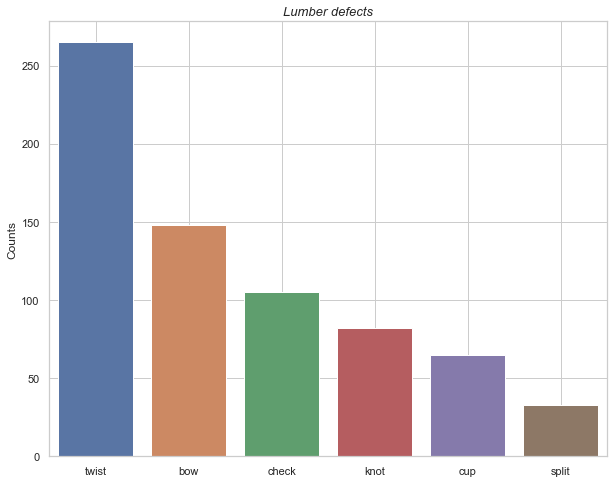

In [4]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
rects=sns.barplot(x=defects.index,y=defects) # bar plot
rects.set_title('Lumber defects',fontsize=13,style='italic') # title of the figure
rects.set_ylabel('Counts') # title of y axes
ax.grid(True) # gridlines

The function to label the bars

In [5]:
def autolabel(rects):
    for p in rects.patches:
        x=p.get_x()+p.get_width()/2 # x coordinate of the label
        y=p.get_y()+p.get_height()*1.02 # y coordinatw of the label
        value='{}'.format(int(p.get_height())) # value of the label
        ax.text(x,y,value,ha='center',size=13) # adding labels the the figure

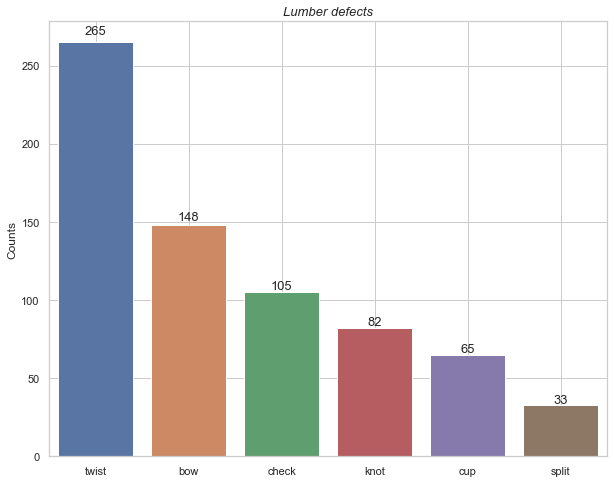

In [6]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
rects=sns.barplot(x=defects.index,y=defects) # bar plot
rects.set_title('Lumber defects',fontsize=13,style='italic') # title of the figure
rects.set_ylabel('Counts') # title of y axes
ax.grid(True) # gridlines
autolabel(rects)

# Task #2.Compare the first and second quarters and make conclusions

In [9]:
dat_tab=dat.groupby(['Defects','Quarter']).agg({'Defects':'count'})
dat_tab.columns=['Counts']
dat_tab=pd.DataFrame(dat_tab)
dat_tab=dat_tab.reset_index()

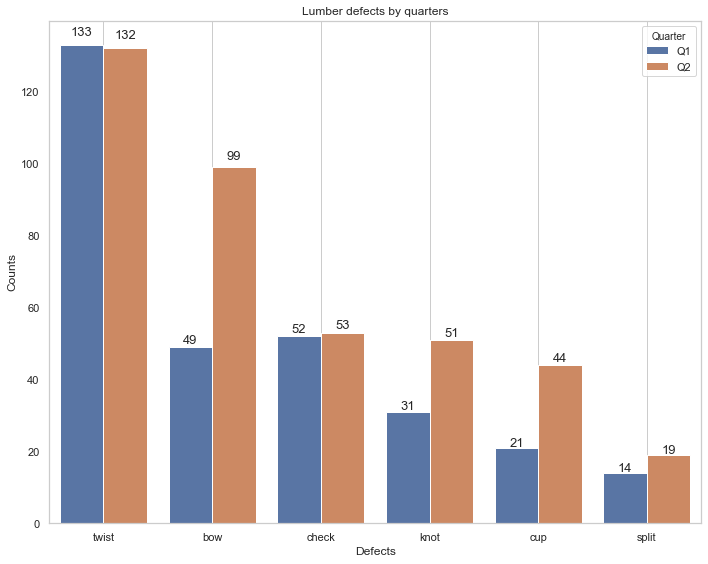

In [8]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
rects=sns.barplot(x='Defects',y='Counts',data=dat_tab,
                  hue='Quarter',order=defects.index
                  )
ax.set_title('Lumber defects by quarters')
autolabel(rects)
ax.grid()
fig.tight_layout()